In [1]:
import sys
sys.path.append(r'c:\Users\SHWETA\Downloads\GPT_synData_proj')
from sqlalchemy import create_engine
from config.db_config import DB_CONFIG
from scripts.create_df import create_df
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
customers_df,orders_df,products_df = create_df(**DB_CONFIG)

In [3]:
orders_df = pd.merge(orders_df,products_df,how='left',on='product_id')

In [4]:
total_revenue = orders_df['price'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 178315.57


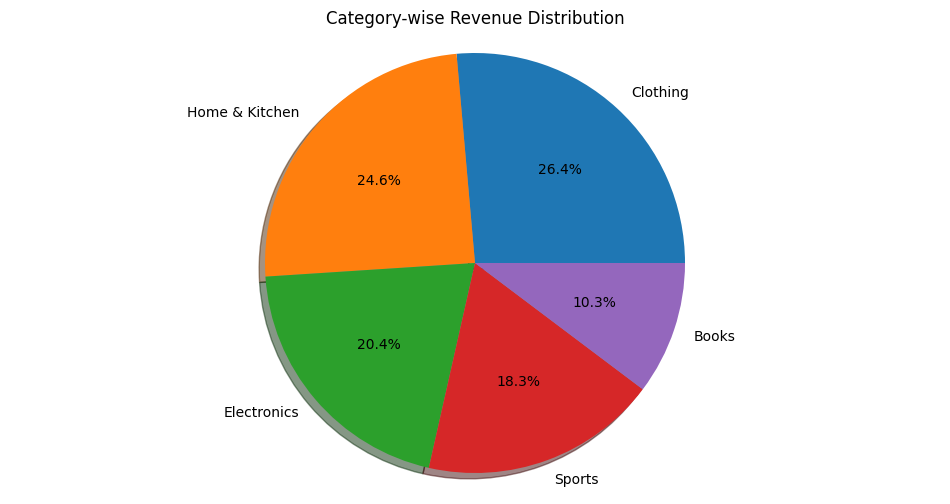

In [5]:
category_wise_revenue = orders_df.groupby(['category'])['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.pie(
    category_wise_revenue,
    labels= category_wise_revenue.index,
    autopct= '%1.1f%%',
    startangle=0,
    shadow=True
)
plt.title('Category-wise Revenue Distribution')
plt.axis('equal')
plt.show()


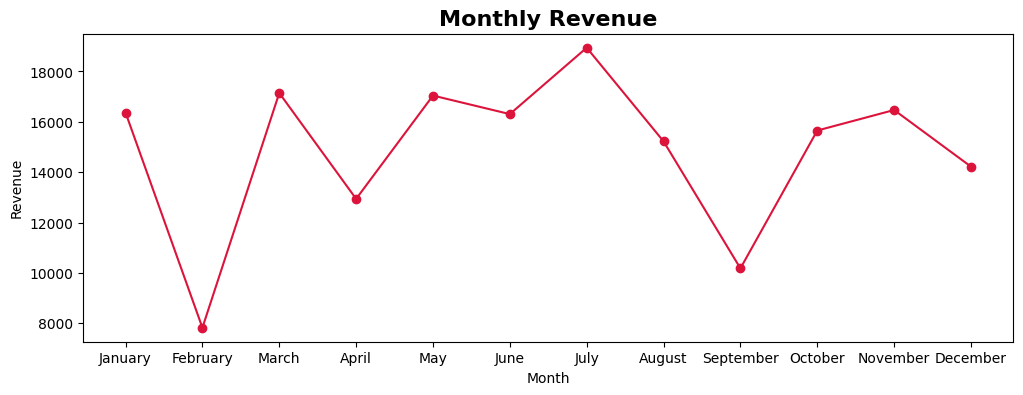

In [6]:
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

orders_df['month_num'] = orders_df['order_date'].dt.month
orders_df['month_name'] = orders_df['order_date'].dt.month_name()

# Group by month number and month name, then sum revenue
monthly_revenue = orders_df.groupby(['month_num', 'month_name'])['price'].sum().sort_index()

plt.figure(figsize=(12,4))
plt.plot(monthly_revenue.index.get_level_values('month_name'), monthly_revenue.values, marker='o',color='crimson')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue', fontsize=16, fontweight="bold")
plt.show()

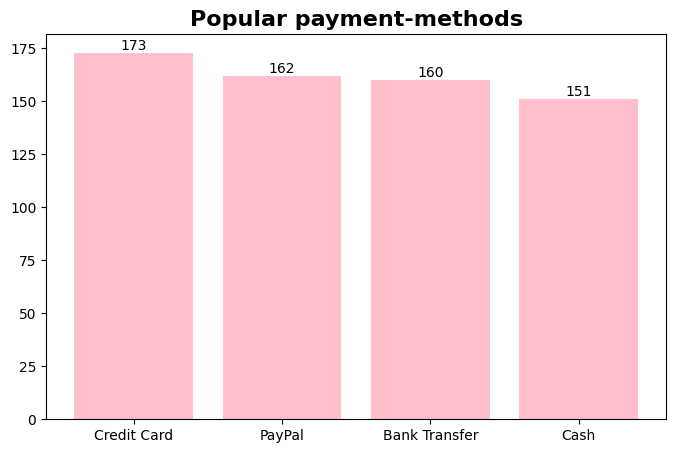

In [7]:
popular_payment_methods = orders_df['payment_method'].value_counts()
plt.figure(figsize=(8,5))
bar = plt.bar(popular_payment_methods.index, popular_payment_methods.values, color='pink')
plt.bar_label(bar)
plt.title('Popular payment-methods', fontsize=16, fontweight="bold")
plt.show()


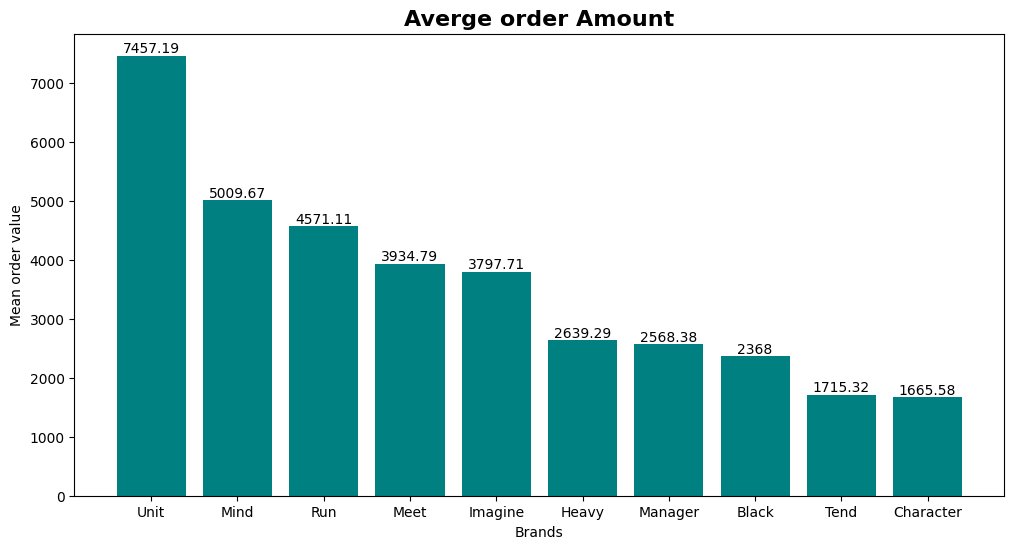

In [8]:
avg_order_val = orders_df.groupby(['product_name'])['total_amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
bars = plt.bar(avg_order_val.index, avg_order_val.values, color='teal')
plt.bar_label(bars)
plt.ylabel('Mean order value')
plt.xlabel('Brands')
plt.title('Averge order Amount', fontsize=16, fontweight="bold")
plt.show()

In [9]:
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'])
customers_df['signup_year'] = customers_df['signup_date'].dt.year
Signup_Year = customers_df['signup_year'].value_counts()
print(f"Signup year:{Signup_Year.index}\n Number of customers: {Signup_Year.values}")


Signup year:Index([2024, 2025, 2023], dtype='int32', name='signup_year')
 Number of customers: [99 62 39]


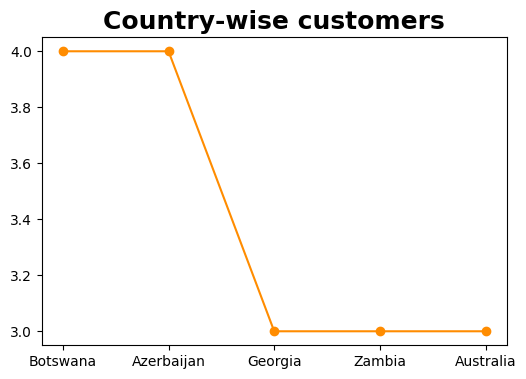

In [10]:
country = customers_df['country'].value_counts().head(6)
country_no_na = country.drop(labels='N/A', errors='ignore')
plt.figure(figsize=(6,4))
plt.plot(country_no_na, marker='o',color ='darkorange')
plt.title('Country-wise customers', fontsize=18, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'High Value Products')

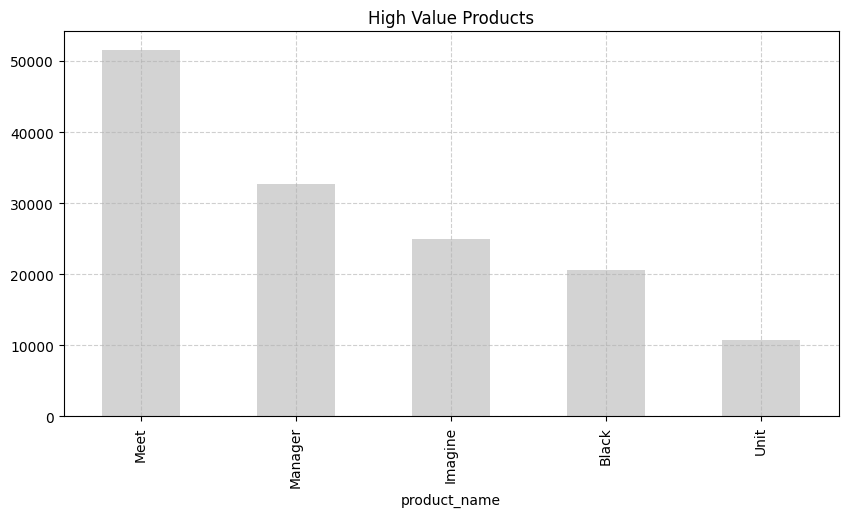

In [11]:
cutoff = orders_df['total_amount'].quantile(0.75)
high_value_orders = orders_df[orders_df['total_amount']>cutoff]        
high_value_prods = high_value_orders.groupby('product_name')['total_amount'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
high_value_prods.plot(kind='bar',color='lightgrey')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('High Value Products')

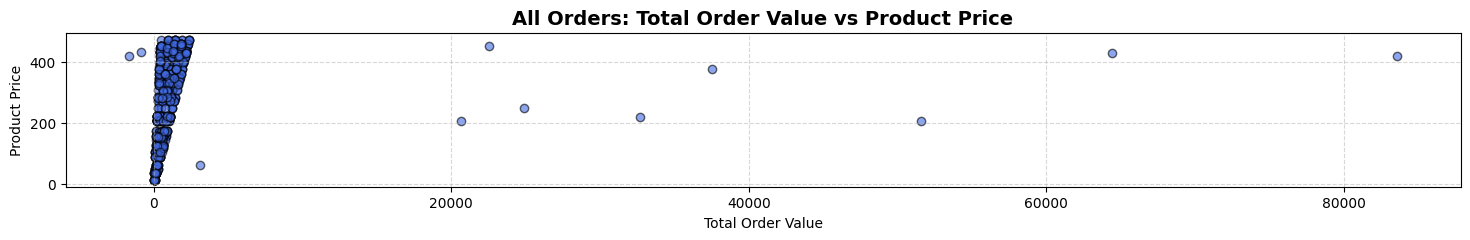

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,2))
plt.scatter(
    orders_df['total_amount'], 
    orders_df['price'], 
    color='royalblue', alpha=0.6, edgecolors='black'
)

plt.title("All Orders: Total Order Value vs Product Price", fontsize=14, fontweight="bold")
plt.xlabel("Total Order Value")
plt.ylabel("Product Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Axes: >

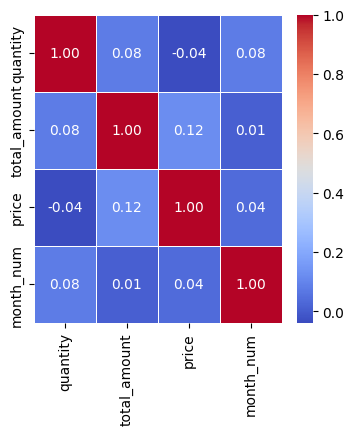

In [13]:
corrr_matrix = orders_df.drop(columns=['order_id','product_id']).select_dtypes(include='number').corr()
plt.figure(figsize=(4,4))
sns.heatmap(corrr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

In [14]:
from scipy import stats

digital_pay = orders_df[orders_df['payment_method']!= 'Cash']['total_amount']
cash_pay = orders_df[orders_df['payment_method']=='Cash']['total_amount']

stats.ttest_ind(cash_pay,digital_pay)

TtestResult(statistic=np.float64(0.13214832044476368), pvalue=np.float64(0.8949082527682568), df=np.float64(644.0))